# Plane wave decomposition (PWD)



M. W. Fertig, «Vector Wave Propagation Method», Thesis, Mannheim, 2011. Chapter: 2.9 "Plane wave decomposition" pag. 41



In [1]:
from diffractio import np, sp, plt, nm, um, mm, degrees
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

In [2]:
from matplotlib import rcParams

rcParams['figure.dpi']=250

## source and mask

In [3]:
x0 = np.linspace(-40 * um, 40 * um, 2048)
z0=np.linspace(0, 100*um,2048)
wavelength=1*um

In [4]:
u0=Scalar_source_X(x0,wavelength)
u0.plane_wave(A=1)

In [5]:
t0=Scalar_mask_X(x0,wavelength)
t0.slit(x0=0, size=40*um);

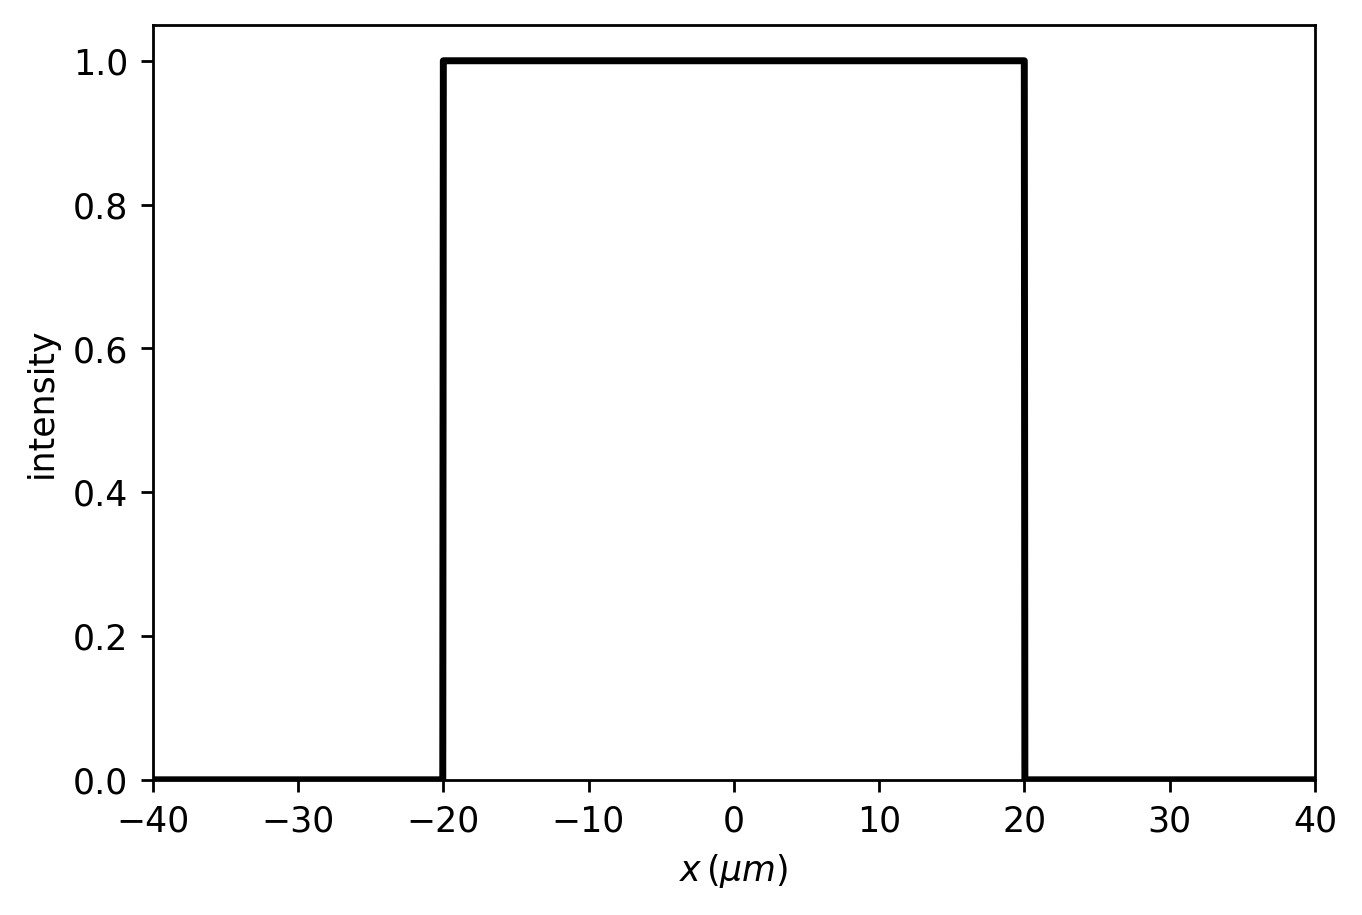

In [6]:
t1=t0*u0
t1.draw()

## definition parameters

In [7]:
u_xz=Scalar_field_XZ(x0,z0,wavelength,n_background=1)

In [ ]:
u_xz.incident_field(t1)

## execution

In [ ]:
u_xz.PWD(verbose=False)

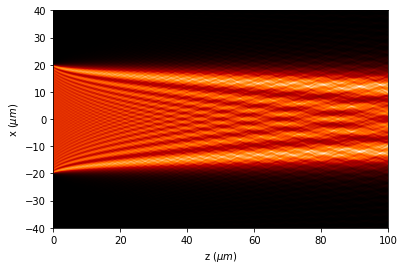

In [ ]:
u_xz.draw()

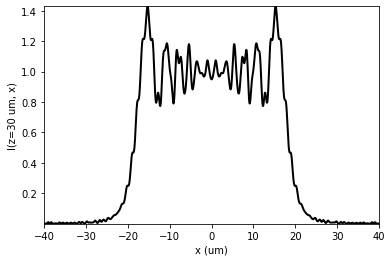

In [ ]:
u_x=u_xz.profile_transversal(z0=30*um, draw=True)

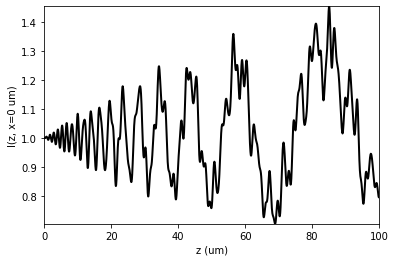

In [ ]:
u_x=u_xz.profile_longitudinal(x0=0*um, draw=True)

## XYZ frame

In [ ]:
from diffractio import np, sp, plt, nm, um, mm, degrees
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [ ]:
x0 = np.linspace(-20, 20, 256)
y0 = np.linspace(-20, 20, 256)
z0 = np.linspace(0, 400, 256)
wavelength = .4 * um


In [ ]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.circle(r0=(0, 0), radius=(10, 10), angle=0 * degrees)

t1 = t0 * u0

In [ ]:
u_xyz = Scalar_field_XYZ(x0, y0, z0, wavelength, n_background=1)


In [ ]:
u_xyz.incident_field(t1)

In [ ]:
%%time
u_xyz.PWD()

CPU times: user 3.4 s, sys: 107 ms, total: 3.51 s
Wall time: 3.52 s


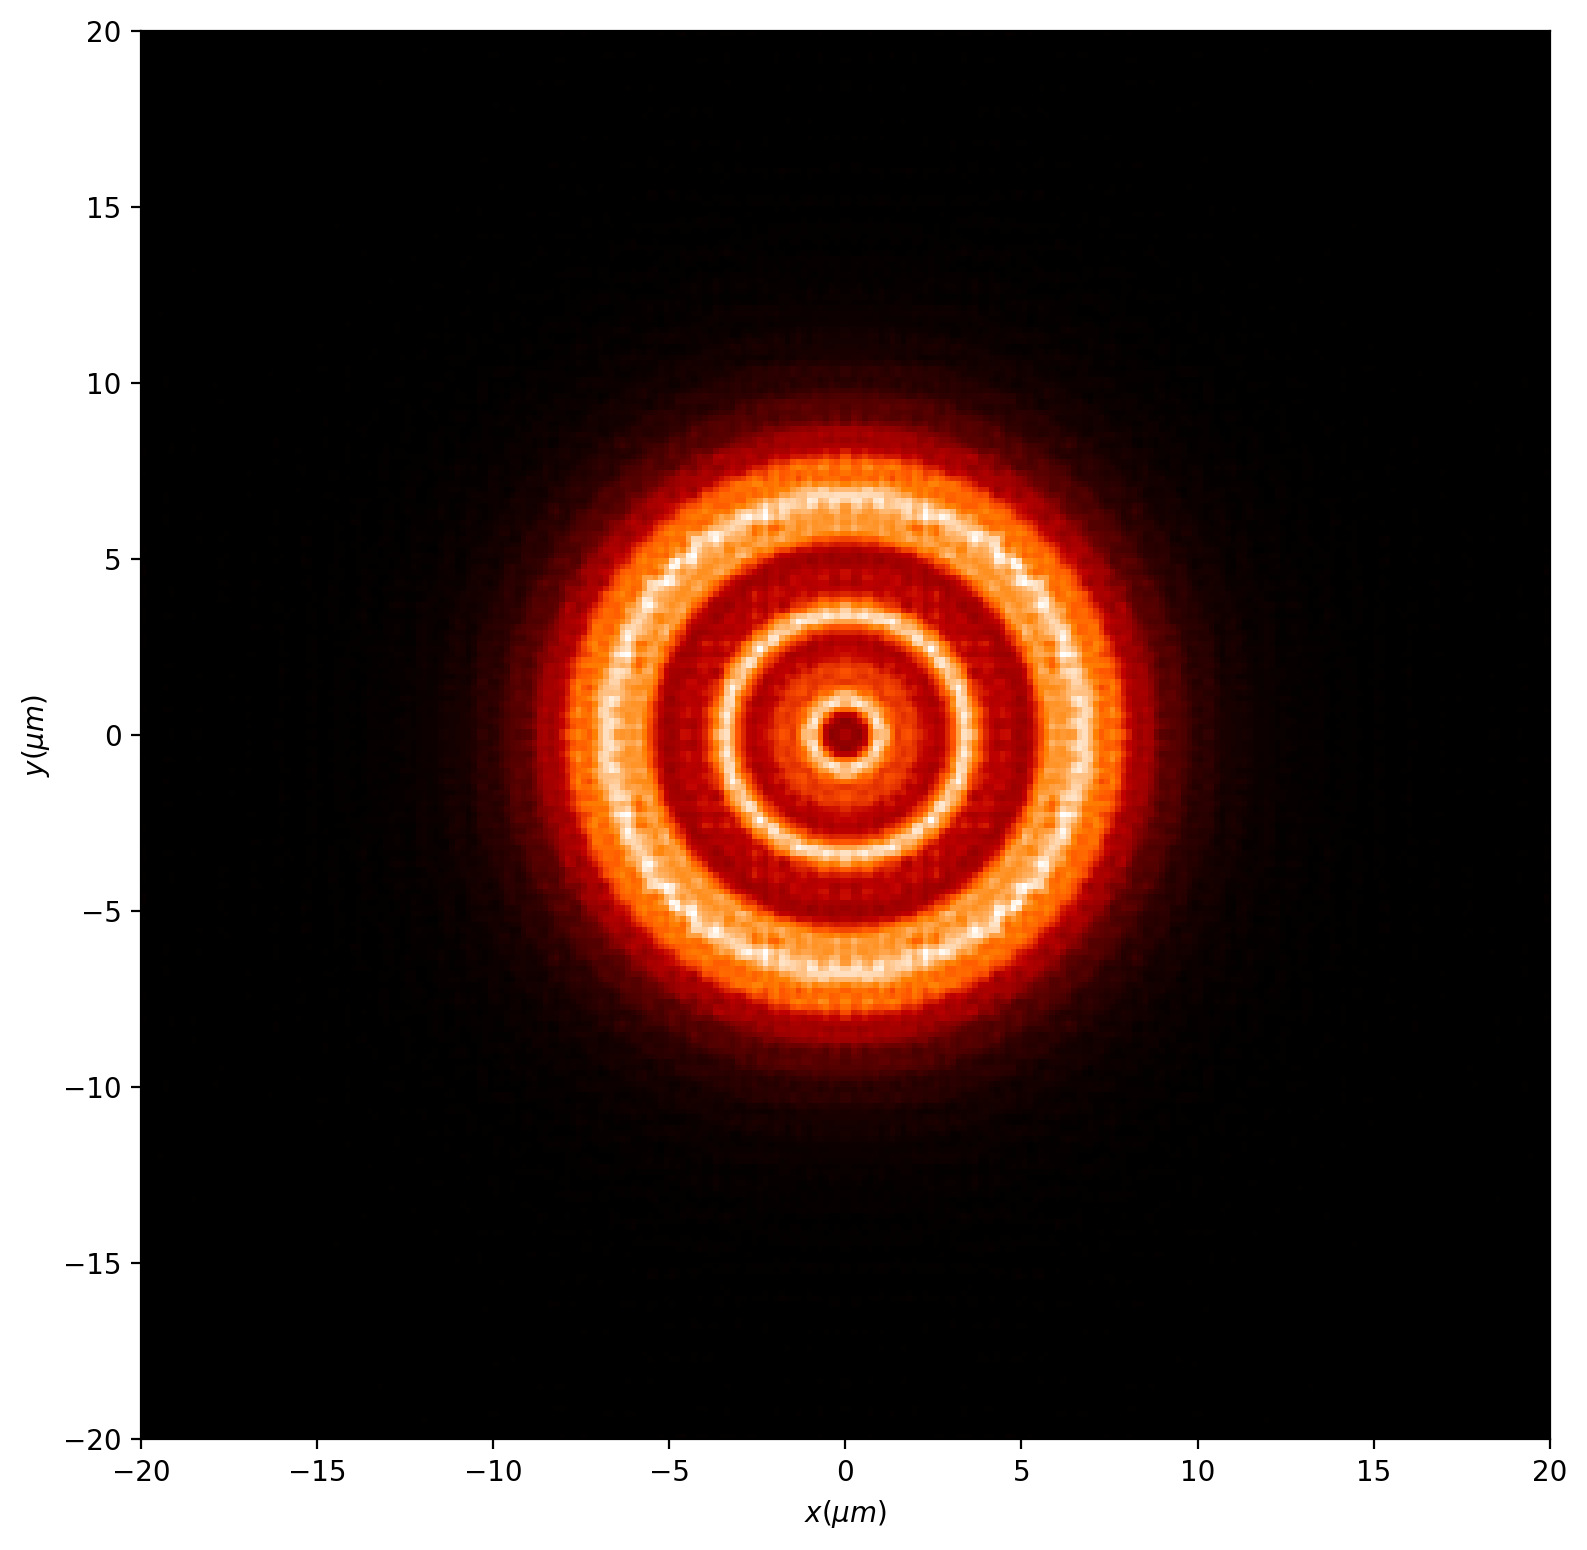

In [ ]:
u_xyz.draw_XY(z0=40 * um)


<Figure size 2800x1600 with 0 Axes>

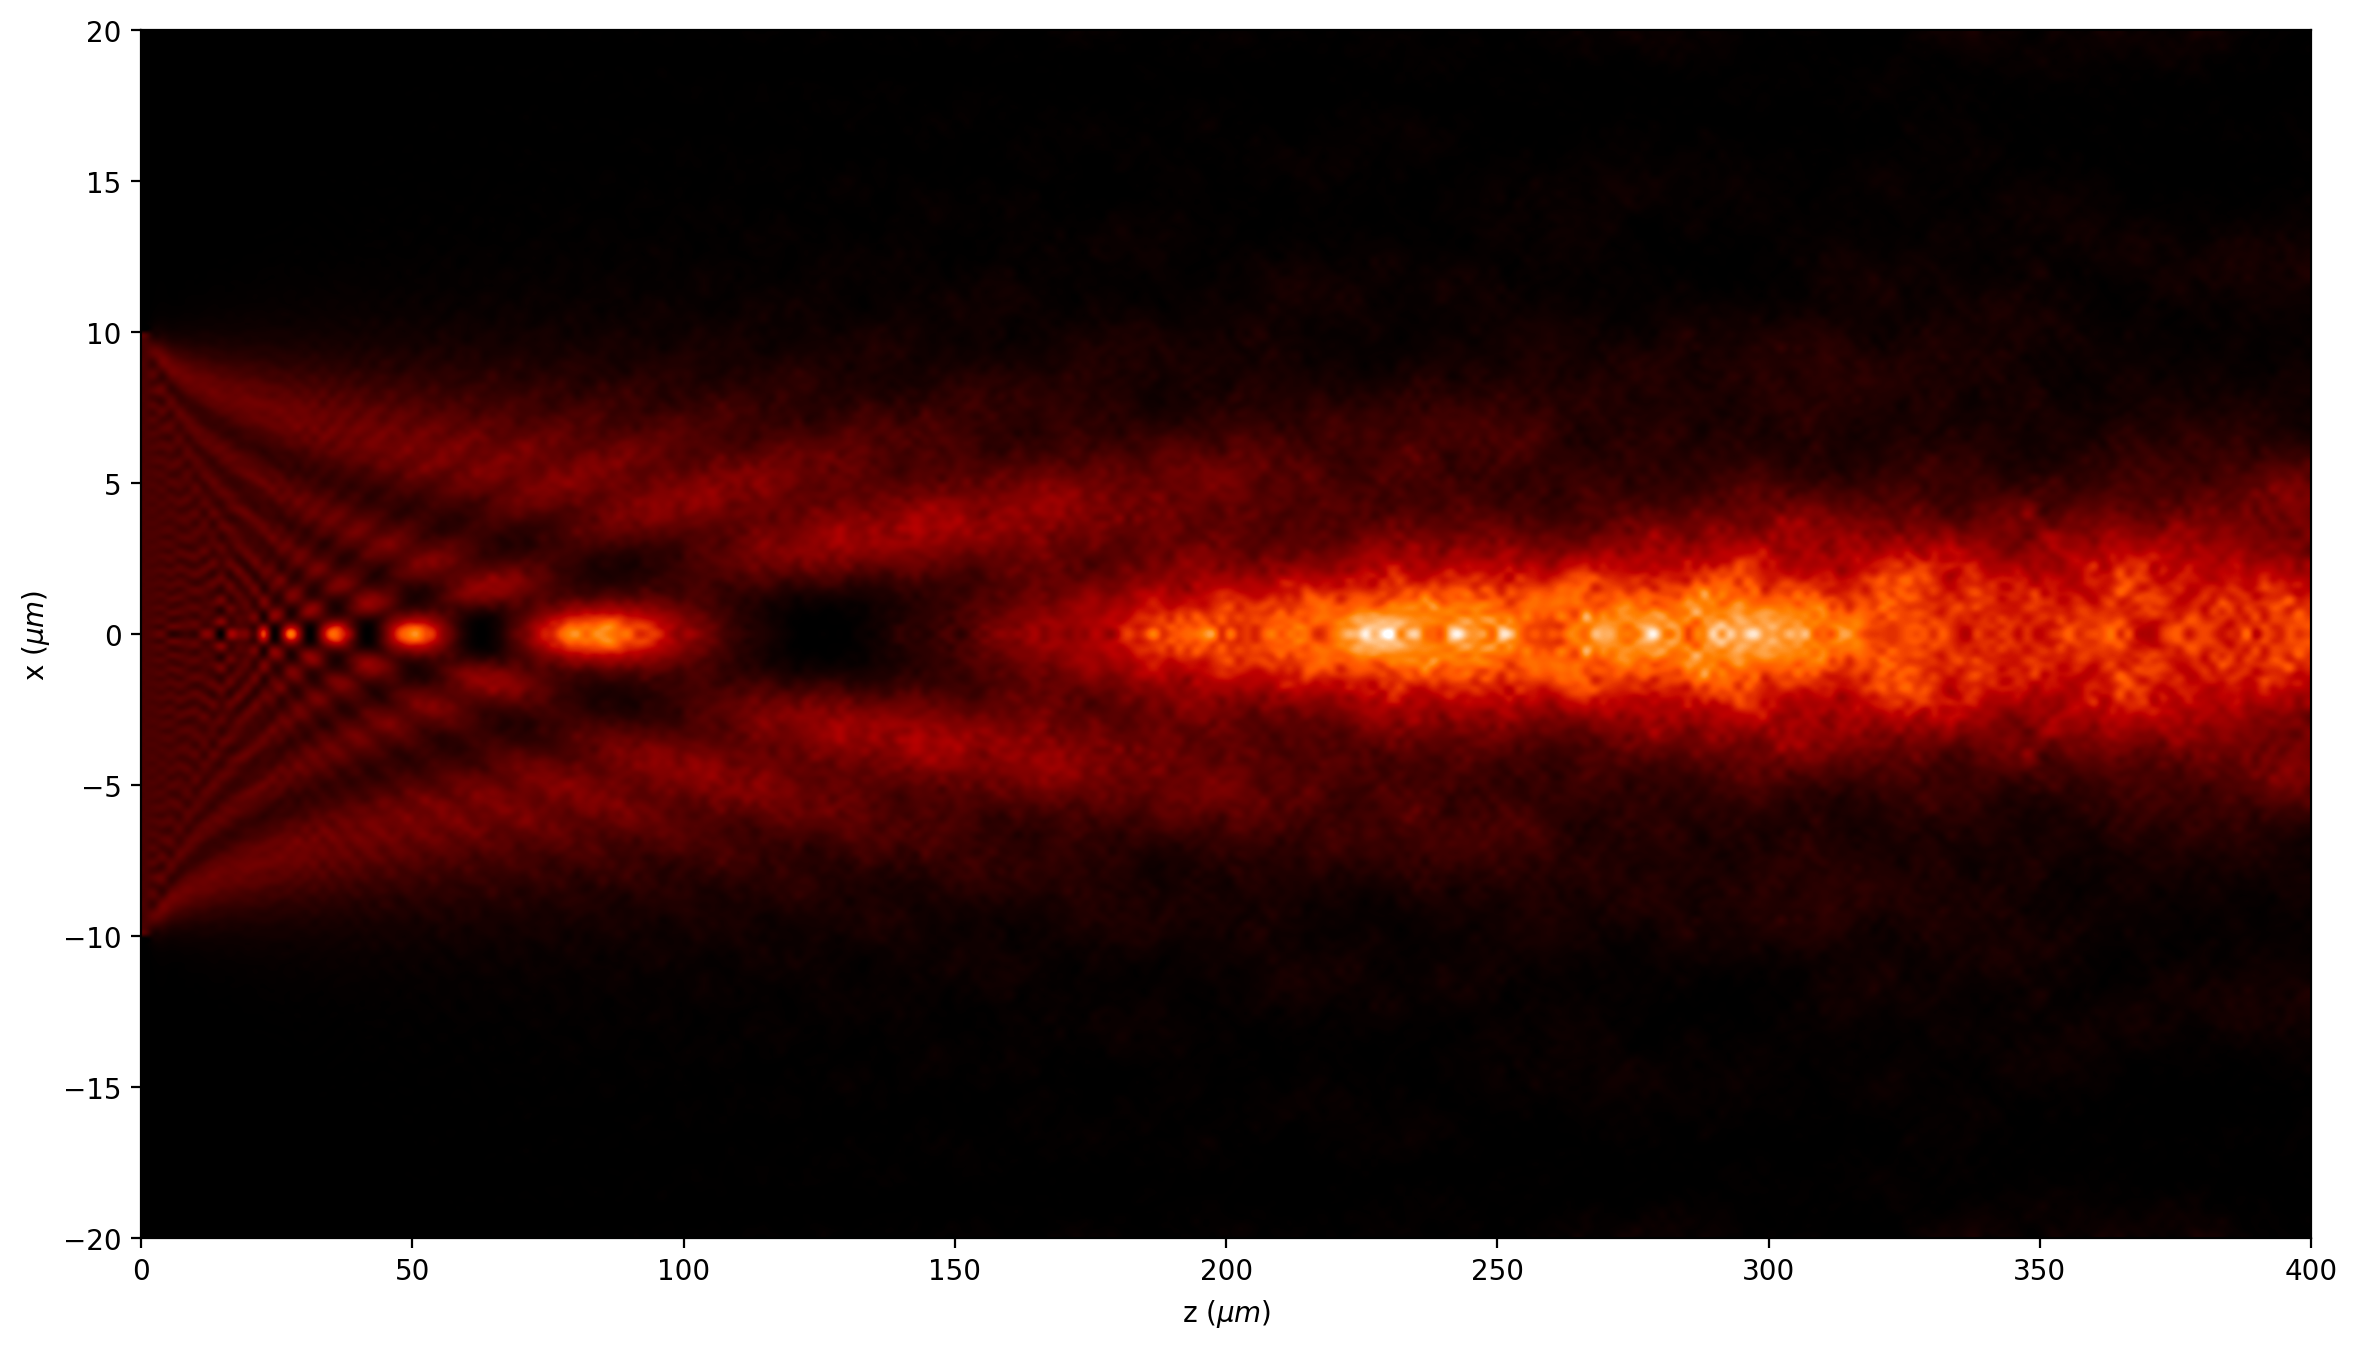

In [ ]:
u_xyz.draw_XZ(y0=0)

This figure can be compared to Rayleigh-Sommerfeld approach. 